In [1]:
library(cowplot)
library(tidyverse)
suppressPackageStartupMessages(library(clusterProfiler))
suppressPackageStartupMessages(library(org.Hs.eg.db))

results <- '../results/'
data <- '../data/'

tumors <- c('ALL', 'AML')

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.5
✔ tidyr   0.8.1     ✔ dplyr   0.7.6
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks stats::filter()
✖ purrr::flatten()  masks jsonlite::flatten()
✖ cowplot::ggsave() masks ggplot2::ggsave()
✖ dplyr::lag()      masks stats::lag()


In [2]:
switches <- lapply(tumors, function(t) paste0(results, t, '/main_switches.tsv')) %>%
       lapply(read_tsv, col_types = 'ccccciiiicci') %>%
       bind_rows

In [3]:
go <- enrichGO(gene     = unique(switches$Symbol),
               OrgDb    = org.Hs.eg.db,
               keyType  = 'SYMBOL') %>%
    as.tibble

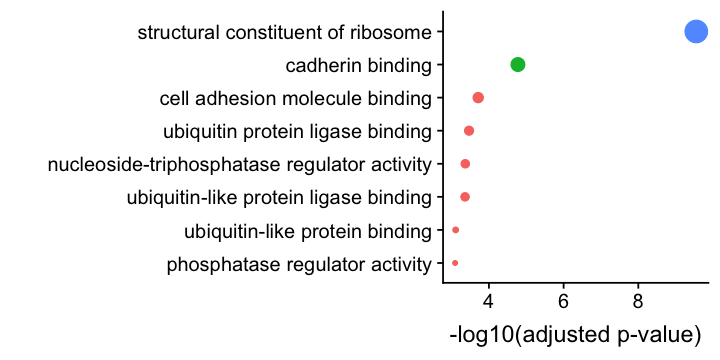

In [14]:
options(repr.plot.width=6, repr.plot.height=3)
go %>%
    mutate(logp = -log10(p.adjust),
           ilogp = as.integer(logp) %>% as.character) %>%
    filter(logp > 3) %>%
    ggplot(aes(x = fct_reorder(Description, -pvalue), y = logp, 
               size = logp, color = ilogp)) +
        geom_point() +
        labs(x = '', y = '-log10(adjusted p-value)') +
        theme(legend.position = 'none') +
        coord_flip()